In [8]:
import pandas as pd
import numpy as np
import re

In [9]:
input_data = pd.read_csv('train.csv')

In [10]:
input_data.head()

,Webpage_id,Domain,Url,Tag
0,1,www.fiercepharma.com,http://www.fiercepharma.com/marketing/tecfider...,news
1,2,www.fiercepharma.com,http://www.fiercepharma.com/pharma/novo-equipp...,news
2,3,www.fiercepharma.com,http://www.fiercepharma.com/pharma/another-exe...,news
3,4,www.fiercepharma.com,http://www.fiercepharma.com/pharma/teva-buy-bi...,news
4,5,www.fiercepharma.com,http://www.fiercepharma.com/marketing/actress-...,news


In [11]:
input_data['Url'][:4]

0    http://www.fiercepharma.com/marketing/tecfider...
1    http://www.fiercepharma.com/pharma/novo-equipp...
2    http://www.fiercepharma.com/pharma/another-exe...
3    http://www.fiercepharma.com/pharma/teva-buy-bi...
Name: Url, dtype: object

In [12]:
url_data= input_data['Url']

In [13]:
import re
def clean_list(input):
    output = []
    for i in input:
        text = re.sub(r"http://", "", i)
        text = re.sub(r"https://", "", text)
        #print(output)
        text = text.split('/')
        output.append(text)
    return output

In [14]:
url_data_pro = clean_list(url_data)

In [15]:
url_data_pro[:4]

[['www.fiercepharma.com',
  'marketing',
  'tecfidera-gilenya-and-aubagio-s-3-way-battle-for-ms-share-about-to-get-more-interesting'],
 ['www.fiercepharma.com',
  'pharma',
  'novo-equipped-to-weather-storm-u-s-diabetes-market-ceo-says'],
 ['www.fiercepharma.com',
  'pharma',
  'another-exec-departs-troubled-endo-and-time-it-s-for-another-drugmaker'],
 ['www.fiercepharma.com',
  'pharma',
  'teva-buy-biosim-specialist-celltrion-it-wouldn-t-say-no']]

In [32]:
from keras.preprocessing import text, sequence

In [33]:
# define network parameters
max_features = 50000
maxlen = 5

In [21]:
def createVocab(field):
    vocab = []
    for line in field:
        for i in line:
            if i not in vocab:
                vocab.append(i)
    return vocab 
 
# generating seq IDs for words in vocabulary
def genSeqNo(vocabulary):
    i=1.0
    vocab_seq = {}
    for word in vocabulary:
        if word not in vocab_seq:
            vocab_seq[word] = i
            i = i+1
    return vocab_seq

# function to replace words with its uniq seq ID
def word2Seq(data):
    result_seq = []
    #max_seq = list(t_vocab_seq.items())[-1][1]
    seq_len = []
    for line in data:        
        seq = []
        curr_len = 0
        for word in line:
            curr_len = curr_len + 1
            if word in t_vocab_seq:
                seq.append(t_vocab_seq[word])
            else:
                seq.append(0)
        result_seq.append(seq)    # to append seqID of line
        seq_len.append(curr_len)  # to find and append length of line
    return result_seq, seq_len

def seqNormalize(seq, data):
    norm_seq = []
    max_seq = max(seq.values())
    norm_seq[:] = [[ele / max_seq for ele in sub] for sub in data]
    return norm_seq


In [22]:
url_vocab = createVocab(url_data_pro)   # creating vocabulary 
t_vocab_seq = genSeqNo(url_vocab)       # generating seqID for each word in vocab
url_seq, seqn_len = word2Seq(url_data_pro)    # replacing word with seqID and a list of each line_length
url_seq_norm = seqNormalize(t_vocab_seq, url_seq)    # normalizing the seqn IDs between 0 n 1

In [23]:
url_seq[:4]

[[1.0, 2.0, 3.0], [1.0, 4.0, 5.0], [1.0, 4.0, 6.0], [1.0, 4.0, 7.0]]

In [24]:
max(seqn_len)

14

In [38]:
import matplotlib.pyplot as plt

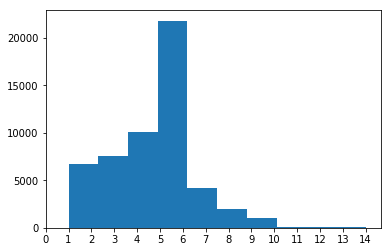

In [39]:
# plotting frequency distribution of SeqnIDs
plt.hist([seqn_len])
plt.xticks(range(15))
plt.show()
# as observed from histogram, taking max_seqn_len as 10

In [26]:
max_seq_len = 6

In [41]:
url_seq_norm[:4]

[[1.822489520685256e-05, 3.644979041370512e-05, 5.467468562055768e-05],
 [1.822489520685256e-05, 7.289958082741024e-05, 9.112447603426281e-05],
 [1.822489520685256e-05, 7.289958082741024e-05, 0.00010934937124111536],
 [1.822489520685256e-05, 7.289958082741024e-05, 0.00012757426644796792]]

In [42]:
print(url_seq[:4])
print(url_data_pro[:4])

[[1.0, 2.0, 3.0], [1.0, 4.0, 5.0], [1.0, 4.0, 6.0], [1.0, 4.0, 7.0]]
['www.fiercepharma.com/marketing/tecfidera-gilenya-and-aubagio-s-3-way-battle-for-ms-share-about-to-get-more-interesting', 'www.fiercepharma.com/pharma/novo-equipped-to-weather-storm-u-s-diabetes-market-ceo-says', 'www.fiercepharma.com/pharma/another-exec-departs-troubled-endo-and-time-it-s-for-another-drugmaker', 'www.fiercepharma.com/pharma/teva-buy-biosim-specialist-celltrion-it-wouldn-t-say-no']


In [43]:
# padding seqn to max_seqn_length
#url_seq_pad = sequence.pad_sequences(url_seq_norm, maxlen = max_seq_len, dtype='float32', padding='post')
url_seq_pad = sequence.pad_sequences(url_seq, maxlen = max_seq_len, dtype='float32', padding='post')

In [44]:
url_seq_pad[:4] 

array([[1., 2., 3., 0., 0., 0., 0., 0., 0., 0.],
       [1., 4., 5., 0., 0., 0., 0., 0., 0., 0.],
       [1., 4., 6., 0., 0., 0., 0., 0., 0., 0.],
       [1., 4., 7., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
x = url_seq_pad
label = np.array(input_data['Tag'])

In [46]:
print(x[:2], y[:2], x.shape, y.shape)

NameError: name 'y' is not defined

In [ ]:
# processing the label to 1 hot encoded.
print(set(label))
output = {}
j=0
for i in set(label):
    print(i)
    #output[i] = format(j, 'b').zfill(4)
    output[i] = j
    j = j+1
print(output.items())

In [47]:
# one-hot encoding via sklearn
#https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label)


# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [48]:
print(onehot_encoded[10])

[0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [49]:
y=onehot_encoded

In [50]:
print(x[:4], y[:4])

[[1. 2. 3. 0. 0. 0. 0. 0. 0. 0.]
 [1. 4. 5. 0. 0. 0. 0. 0. 0. 0.]
 [1. 4. 6. 0. 0. 0. 0. 0. 0. 0.]
 [1. 4. 7. 0. 0. 0. 0. 0. 0. 0.]] [[0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [51]:
# saving final processed  input n output
np.savetxt('in_train.txt', x, fmt='%f')
np.savetxt('out_train.txt', y, fmt='%f')

In [82]:
# generating the model
from keras.layers import Input, Dense, Dropout, Conv1D, Flatten
from keras.models import Model

In [84]:
input_layer = Input(shape=(10,1,))

z = Conv1D(9, 1, activation='relu', padding='same')(input_layer)
print('conv1', z.shape)
z = Dense(10, activation='relu')(z)
print('dense2', z.shape)
z = Dropout(0.2)(z)
z = Dense(9, activation='relu')(z)
print('dense3', z.shape)
z = Dropout(0.2)(z)
z = Flatten()(z)
z = Dense(9, activation='softmax')(z)
print('dense6', z.shape)
final =z

conv1 (?, 10, 9)
dense2 (?, 10, 10)
dense3 (?, 10, 9)
dense6 (?, 9)


In [85]:
print(type(x))
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(53447, 9)


In [86]:
model = Model(input_layer, final)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 9)             18        
_________________________________________________________________
dense_13 (Dense)             (None, 10, 10)            100       
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 10)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 10, 9)             99        
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 9)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 90)                0         
__________

In [89]:
print(x.shape)
print(x.reshape(53447,10,1).shape)
X_t = x.reshape(53447,10,1)
Y_t = y.reshape(53447,9)

(53447, 10)
(53447, 10, 1)


In [90]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
BATCH_SIZE = 50
epochs = 500
VALIDATION_SPLIT=0.2
print('Training model...')
r = model.fit(X_t,
              Y_t,
              batch_size=BATCH_SIZE,
              epochs=epochs,
              shuffle=True,
              validation_split=VALIDATION_SPLIT)

Training model...
Train on 42757 samples, validate on 10690 samples
Epoch 1/500
42757/42757 [==============================] - 7s 168us/step - loss: 12.4983 - acc: 0.2194 - val_loss: 12.8005 - val_acc: 0.2058
Epoch 2/500
42757/42757 [==============================] - 4s 82us/step - loss: 10.6539 - acc: 0.3356 - val_loss: 12.7335 - val_acc: 0.2098
Epoch 3/500
42757/42757 [==============================] - 3s 65us/step - loss: 10.3783 - acc: 0.3540 - val_loss: 12.6968 - val_acc: 0.2086
Epoch 4/500
42757/42757 [==============================] - 5s 126us/step - loss: 10.0742 - acc: 0.3683 - val_loss: 12.8050 - val_acc: 0.2036
Epoch 5/500
42757/42757 [==============================] - 3s 82us/step - loss: 4.8888 - acc: 0.3309 - val_loss: 3.3106 - val_acc: 0.2184
Epoch 6/500
42757/42757 [==============================] - 3s 76us/step - loss: 1.7544 - acc: 0.3767 - val_loss: 4.6990 - val_acc: 0.2136
Epoch 7/500
42757/42757 [==============================] - 4s 90us/step - loss: 1.6553 - acc: 

Epoch 118/500
42757/42757 [==============================] - 3s 77us/step - loss: 1.1449 - acc: 0.5883 - val_loss: 6.3518 - val_acc: 0.2120
Epoch 119/500
42757/42757 [==============================] - 3s 78us/step - loss: 1.1411 - acc: 0.5876 - val_loss: 6.2826 - val_acc: 0.2058
Epoch 120/500
42757/42757 [==============================] - 3s 76us/step - loss: 1.1628 - acc: 0.5833 - val_loss: 6.3161 - val_acc: 0.2043
Epoch 121/500
42757/42757 [==============================] - 4s 88us/step - loss: 1.1370 - acc: 0.5909 - val_loss: 6.2817 - val_acc: 0.2154
Epoch 122/500
42757/42757 [==============================] - 3s 81us/step - loss: 1.1400 - acc: 0.5902 - val_loss: 6.4867 - val_acc: 0.2117
Epoch 123/500
42757/42757 [==============================] - 3s 72us/step - loss: 1.1421 - acc: 0.5918 - val_loss: 6.4059 - val_acc: 0.2092
Epoch 124/500
42757/42757 [==============================] - 4s 88us/step - loss: 1.1548 - acc: 0.5852 - val_loss: 6.2726 - val_acc: 0.2096
Epoch 125/500
42757/

42757/42757 [==============================] - 3s 63us/step - loss: 1.1380 - acc: 0.5952 - val_loss: 6.8182 - val_acc: 0.2134
Epoch 235/500
42757/42757 [==============================] - 3s 63us/step - loss: 1.1466 - acc: 0.5921 - val_loss: 6.4568 - val_acc: 0.2150
Epoch 236/500
42757/42757 [==============================] - 3s 69us/step - loss: 1.1320 - acc: 0.5964 - val_loss: 6.7557 - val_acc: 0.2098
Epoch 237/500
42757/42757 [==============================] - 3s 71us/step - loss: 1.1617 - acc: 0.5885 - val_loss: 6.2689 - val_acc: 0.2146
Epoch 238/500
42757/42757 [==============================] - 3s 72us/step - loss: 1.1335 - acc: 0.5955 - val_loss: 6.3881 - val_acc: 0.2173
Epoch 239/500
42757/42757 [==============================] - 3s 75us/step - loss: 1.1364 - acc: 0.5969 - val_loss: 6.9328 - val_acc: 0.2138
Epoch 240/500
42757/42757 [==============================] - 3s 62us/step - loss: 1.1409 - acc: 0.5935 - val_loss: 6.2296 - val_acc: 0.2151
Epoch 241/500
42757/42757 [=======

KeyboardInterrupt: 

In [5]:
import numpy as np
np.arange(1950.00, 1000.00, -100.00)[0:5]

array([1950., 1850., 1750., 1650., 1550.])

In [6]:
np.arange(6, 1, -1)[0:5].reshape(5,1)

array([[6],
       [5],
       [4],
       [3],
       [2]])